<h1> Install Packages </h1>

In [1]:
!pip install tensorflow
!pip install numpy
!pip install -U imbalanced-learn
!pip install pandas
!pip install scikit-learn
!pip install imbalanced-learn
!pip install keras-tuner

<h1> Import Packages </h1>

In [2]:
import pandas as pd
import numpy as np
import imblearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

2024-03-31 13:22:48.972291: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 13:22:49.816766: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<h1> Inspect Dataset (Before ROS) </h1>

In [3]:
final_df = pd.read_csv('../merged_df.csv')
final_df.drop('Unnamed: 0', axis='columns', inplace=True)
final_df.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,8,Crema\1015_IEO_ANG_HI.wav,-274.081064,90.553742,-1.319409,28.355147,-3.295721,4.588043,-4.467366,6.737204,...,0.000086,0.000085,0.000080,0.000078,-0.016402,-0.013311,-0.054505,0.011296,0.012550,0.009563
1,12,Crema\1062_IWL_HAP_XX.wav,-282.730691,71.540738,34.301680,11.759998,2.890566,-2.018548,-3.562313,-3.235804,...,0.000976,0.000892,0.000916,0.000897,0.041275,0.032079,0.008832,-0.025359,0.013441,0.032247
2,5,Crema\1028_ITS_NEU_XX.wav,-391.468786,86.299907,44.825176,37.441880,12.426751,7.889423,0.606896,2.038279,...,0.000043,0.000041,0.000043,0.000041,-0.005835,0.003289,-0.048369,-0.063204,0.011831,0.009074
3,4,Tess\OAF_happy\OAF_kick_happy.wav,-471.930760,63.462643,13.026071,7.454551,7.756898,-2.243907,-15.625067,3.636577,...,0.000437,0.000529,0.000278,0.000023,-0.005725,0.030310,-0.053869,-0.018939,-0.024129,-0.016006
4,8,Crema\1085_IEO_ANG_LO.wav,-325.833235,65.936750,17.097764,19.950584,-0.243021,13.107857,4.477988,0.751412,...,0.000144,0.000141,0.000145,0.000145,-0.008370,-0.026442,-0.042298,0.055370,-0.000482,0.018563


# Shuffle Dataset

In [4]:
final_df = shuffle(final_df)
final_df

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
1034,8,Crema\1034_IWW_ANG_XX.wav,-355.811900,136.507800,14.927839,36.934887,-9.452792,3.649290,1.247151,-2.846498,...,7.187738e-10,7.056591e-10,6.972936e-10,6.921017e-10,0.004138,-0.014492,-0.023372,-0.074923,0.028467,0.016021
14247,11,Crema\1032_DFA_FEA_XX.wav,-357.074745,70.299505,35.734124,29.245747,16.762764,5.329271,-2.359757,-4.126671,...,1.500231e-04,1.605114e-04,1.573506e-04,1.664982e-04,0.009427,-0.041372,-0.048313,-0.060099,-0.011682,0.013110
13774,0,Crema\1010_IOM_ANG_XX.wav,-386.122620,118.351814,0.705885,58.796154,-10.526814,20.503857,-3.059839,8.250331,...,2.303170e-10,2.238983e-10,2.196728e-10,2.171000e-10,-0.003987,-0.037830,-0.143611,-0.015463,0.007094,0.015365
2859,6,Crema\1063_IEO_SAD_LO.wav,-460.551420,165.575940,-0.772433,61.468803,-31.663036,45.371258,-22.893873,20.437569,...,2.123743e-08,2.081280e-08,2.053819e-08,2.036848e-08,0.016413,-0.011579,-0.022510,0.011800,0.027139,0.000731
10697,0,Crema\1018_IEO_ANG_MD.wav,-328.028200,128.834140,-7.556426,35.667270,-17.930160,15.242033,-5.254604,1.418246,...,4.580718e-10,4.529278e-10,4.497568e-10,4.476994e-10,0.003473,-0.008848,-0.057003,0.002191,0.017923,-0.006709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16900,5,Crema\1029_ITS_NEU_XX.wav,-382.424000,132.639680,5.541722,55.387570,-16.726805,10.821631,-21.764189,10.323193,...,6.708577e-09,6.606358e-09,6.541357e-09,6.500496e-09,0.003463,-0.008226,-0.055684,-0.065446,0.014550,0.006380
9653,11,Crema\1045_IEO_FEA_LO.wav,-434.761141,94.220785,43.665424,27.382049,7.620634,10.343989,1.527119,-0.610183,...,1.633147e-05,1.466017e-05,1.451746e-05,1.513799e-05,0.024527,-0.007965,-0.044558,-0.009635,0.006201,0.007754
4061,5,Crema\1007_TIE_NEU_XX.wav,-393.810165,73.411402,40.184762,35.244680,20.239455,5.297027,-1.220762,1.602956,...,7.059888e-05,6.838487e-05,7.026400e-05,7.450601e-05,0.007946,0.003619,-0.085508,-0.067922,0.005915,0.004183
17566,3,Crema\1047_IEO_FEA_MD.wav,-345.767400,120.150856,-1.723461,40.991806,-11.265298,23.014742,-12.532726,5.866927,...,1.217872e-11,1.207097e-11,1.201883e-11,1.198715e-11,0.005039,-0.014773,-0.039506,-0.041531,0.032353,-0.004932


<h1> Sanitise Dataset (Target = Emotions) </h1>

In [5]:
final_df_testing = final_df.copy()

X = final_df_testing.drop(columns=['Path', 'Emotions'], axis=1)
y = final_df_testing['Emotions']
print(X.shape, y.shape)

(23364, 173) (23364,)


<h1> ROS </h1>

In [6]:
ros = RandomOverSampler(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_ros_train, y_ros_train = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('\n')
print('Resample dataset shape', Counter(y_ros_train))

Original dataset shape Counter({2: 1761, 6: 1748, 0: 1744, 4: 1740, 3: 1718, 5: 1556, 8: 1241, 14: 1238, 10: 1235, 11: 1231, 12: 1219, 13: 1004, 7: 796, 9: 162, 15: 153, 1: 145})


Resample dataset shape Counter({13: 1761, 12: 1761, 14: 1761, 4: 1761, 2: 1761, 5: 1761, 7: 1761, 6: 1761, 3: 1761, 8: 1761, 11: 1761, 0: 1761, 10: 1761, 1: 1761, 9: 1761, 15: 1761})


In [7]:
X_train

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
20873,-402.838473,79.546010,41.574187,29.672072,17.236628,8.129678,2.501603,1.199180,-0.850481,-4.252107,...,5.550981e-05,5.400543e-05,5.365498e-05,5.491136e-05,-0.015438,0.026847,-0.095257,0.012152,0.014658,0.012463
18816,-333.790325,61.517286,33.429527,21.074675,9.565433,7.119255,-0.143074,-2.227390,-5.403284,-4.087456,...,3.252346e-04,3.437191e-04,3.306681e-04,3.261578e-04,-0.022323,0.008965,-0.066941,-0.040460,0.026156,-0.013289
15031,-648.495800,49.664616,0.015855,11.489881,7.758655,1.638758,-0.429899,-5.702272,-5.182213,-5.329655,...,8.071726e-05,9.774580e-05,5.798253e-05,2.667754e-06,-0.007765,-0.006010,0.061606,0.004103,-0.010828,0.016706
11348,-328.164980,132.681850,-6.049914,48.938070,-7.008670,7.054938,-20.595402,-1.647969,-15.019496,-0.257573,...,2.917773e-10,2.909337e-10,2.905934e-10,2.902704e-10,-0.000655,-0.020072,-0.049351,-0.046122,0.028024,0.006968
21902,-424.854770,141.678250,16.510280,58.071354,-12.295271,22.108920,-14.377939,9.119392,-12.438108,4.311117,...,1.304858e-08,1.282005e-08,1.267360e-08,1.258243e-08,-0.014417,0.003825,-0.051290,-0.078656,0.012016,0.014959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19485,-426.168150,141.783750,10.612165,54.591846,-15.987386,26.672121,-14.957945,10.400774,-12.600634,7.346714,...,7.729177e-09,7.619395e-09,7.550393e-09,7.506832e-09,-0.001209,-0.021961,-0.051515,-0.028556,0.021170,-0.001098
14062,-377.647700,123.987150,20.090635,52.206123,-14.833565,12.792801,-17.826372,8.545362,-11.961030,1.171968,...,8.887180e-10,8.649268e-10,8.493131e-10,8.397647e-10,0.024916,-0.039877,-0.039511,-0.074687,0.020591,0.025253
11088,-299.377623,29.583030,-10.810777,-11.549799,-5.209882,0.831612,-8.046480,-2.033949,-5.840410,-5.759077,...,6.987229e-04,6.582698e-04,6.048453e-04,5.841416e-04,0.038500,-0.014950,-0.083511,-0.124590,-0.017546,-0.043431
8517,-370.618969,69.788068,35.154012,27.783044,12.427907,9.927129,0.966707,-0.396326,-6.545676,0.678792,...,9.976646e-05,1.017553e-04,9.523841e-05,1.088202e-04,0.014011,0.001287,-0.180159,0.041816,0.015781,0.027374


<h1> Model Building and Model Tuning </h1>

In [8]:
model = tf.keras.Sequential()

model.add(layers.Conv1D(256, kernel_size=5, strides=1, 
                        padding="same", activation="relu",
                        input_shape=(X_ros_train.shape[1], 1))) 

model.add(layers.Conv1D(128, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model.add(layers.Conv1D(64, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model.add(layers.Conv1D(32, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model.add(layers.Flatten()) # flatten into a 1D array
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(32, activation='relu')) 

model.add(layers.Dense(len(np.unique(y_ros_train)), activation="softmax")) 
model.summary()


/common/home/projectgrps/IS424/IS424G4/jupyterlab-venv-py311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-31 13:22:51.668698: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 173, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 173, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 173, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 173, 32)        │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,417,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,678,032 (6.40 MB)

 Trainable params: 1,678,032 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

# Compile Model

In [9]:
learning_rate = 1e-4

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Model Fitting and Model Evaluation

In [10]:
# Regularisation - Define early stopping callback 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

epochs = 100

history = model.fit(X_ros_train, y_ros_train, epochs=epochs, validation_split=0.2, callbacks=[early_stopping]) 
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/100
705/705 ━━━━━━━━━━━━━━━━━━━━ 84s 118ms/step - accuracy: 0.3009 - loss: 2.1536 - val_accuracy: 0.2633 - val_loss: 2.5103
Epoch 2/100
705/705 ━━━━━━━━━━━━━━━━━━━━ 93s 131ms/step - accuracy: 0.5451 - loss: 1.3538 - val_accuracy: 0.2942 - val_loss: 2.1155
Epoch 3/100
705/705 ━━━━━━━━━━━━━━━━━━━━ 92s 131ms/step - accuracy: 0.5847 - loss: 1.1814 - val_accuracy: 0.3840 - val_loss: 1.8625
Epoch 4/100
705/705 ━━━━━━━━━━━━━━━━━━━━ 93s 131ms/step - accuracy: 0.6117 - loss: 1.0918 - val_accuracy: 0.4980 - val_loss: 1.4783
Epoch 5/100
705/705 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.6350 - loss: 1.0135 - val_accuracy: 0.4697 - val_loss: 1.4620
Epoch 6/100
705/705 ━━━━━━━━━━━━━━━━━━━━ 93s 131ms/step - accuracy: 0.6578 - loss: 0.9465 - val_accuracy: 0.4319 - val_loss: 1.5700
Epoch 7/100
705/705 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.6757 - loss: 0.8937 - val_accuracy: 0.4867 - val_loss: 1.4273
Epoch 8/100
705/705 ━━━━━━━━━━━━━━━━━━━━ 76s 107ms/step - accuracy: 0.6871 -

# Save Model

In [11]:
model_name = 'merge_CNN_tao.keras'

model.save(model_name)

# Test Saved Model

In [12]:
# Load the saved model
model_name = 'merge_CNN_tao.keras'
loaded_model = tf.keras.models.load_model(model_name)

# Evaluate the model on the test data
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7438 - loss: 1.1947
Test Loss: 1.2124781608581543, Test Accuracy: 0.7397817373275757


<h1> Visualization of Training Loss/Accuracy Over Epochs </h1>

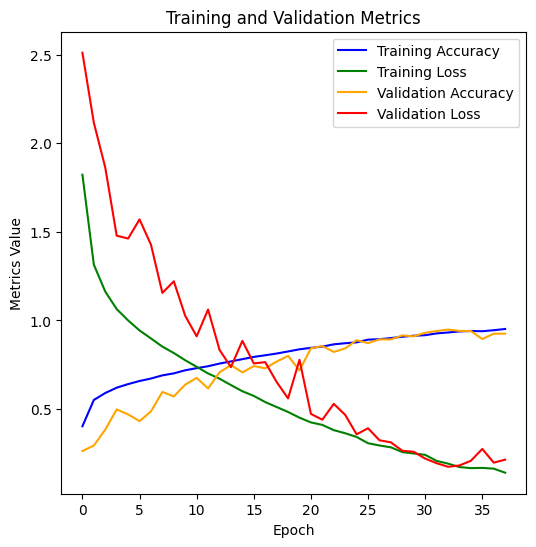

In [13]:
plt.figure(figsize=(6, 6))

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss', color='green')

# Plot Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Plot Validation Loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()

plt.grid(False)
plt.show()


<h1> Visualization for accuracy, precision, recall and F1-Score </h1>

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


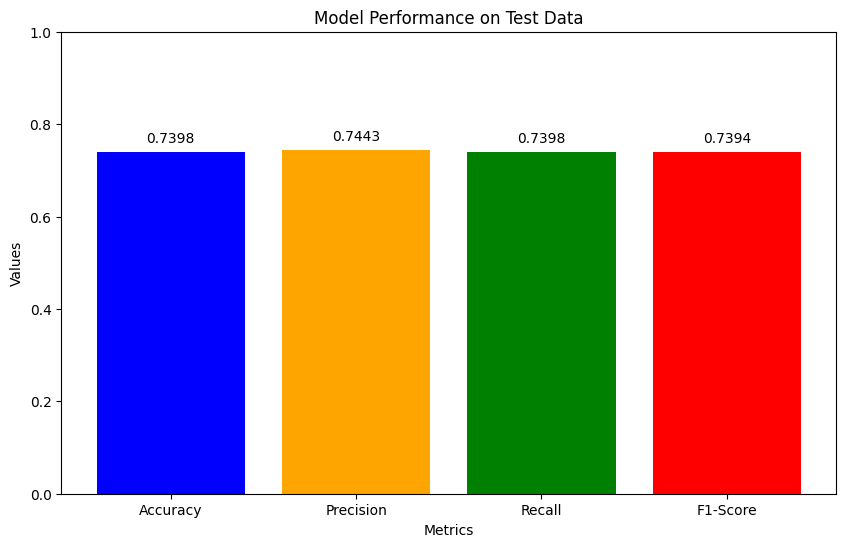

In [14]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
f1 = f1_score(y_test, predicted_classes, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance on Test Data')
plt.ylim(0, 1)  # Assuming the metrics are in proportion (0 to 1)
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.4}", ha='center')
plt.show()

<h1> Visualization of Confusion Matrix and Classification Report </h1>

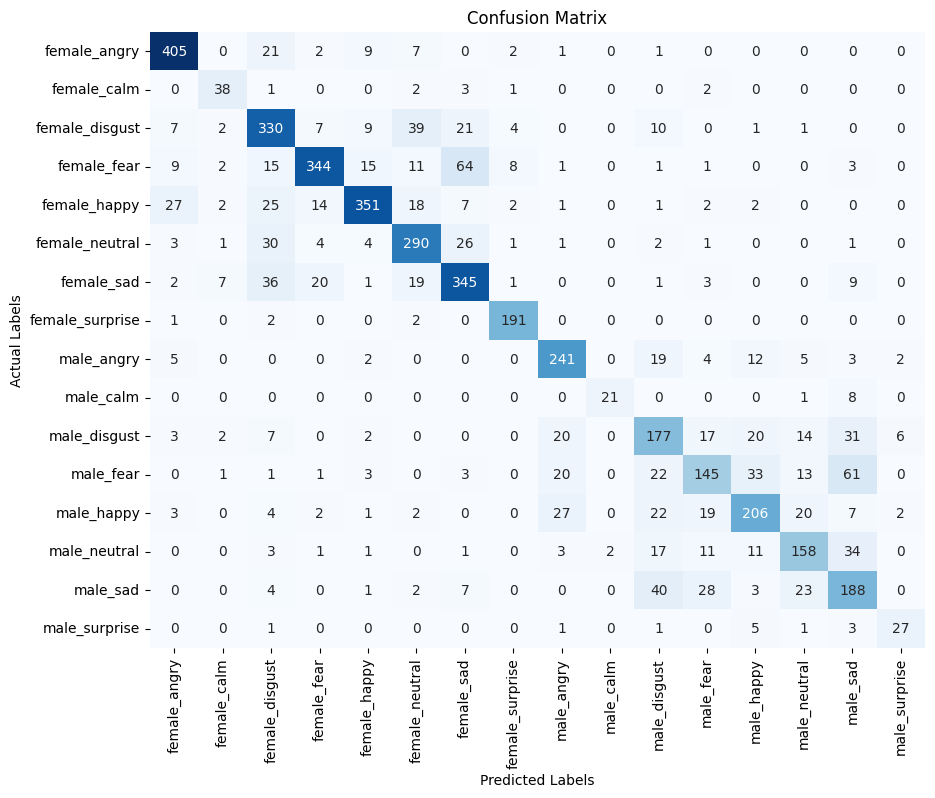

                 precision    recall  f1-score   support

   female_angry       0.87      0.90      0.89       448
    female_calm       0.69      0.81      0.75        47
 female_disgust       0.69      0.77      0.72       431
    female_fear       0.87      0.73      0.79       474
   female_happy       0.88      0.78      0.82       452
 female_neutral       0.74      0.80      0.77       364
     female_sad       0.72      0.78      0.75       444
female_surprise       0.91      0.97      0.94       196
     male_angry       0.76      0.82      0.79       293
      male_calm       0.91      0.70      0.79        30
   male_disgust       0.56      0.59      0.58       299
      male_fear       0.62      0.48      0.54       303
     male_happy       0.70      0.65      0.68       315
   male_neutral       0.67      0.65      0.66       242
       male_sad       0.54      0.64      0.58       296
  male_surprise       0.73      0.69      0.71        39

       accuracy              

In [15]:
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

class_labels = [label_map_with_gender[i] for i in range(len(label_map_with_gender))]


cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=class_labels))

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Final Model Building and Final Model Tuning 

In [30]:
model_final = tf.keras.Sequential()

model_final.add(layers.Conv1D(256, kernel_size=5, strides=1, 
                        padding="same", activation="relu",
                        input_shape=(X_ros_train.shape[1], 1))) 

model_final.add(layers.Conv1D(128, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model_final.add(layers.Conv1D(64, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model_final.add(layers.Conv1D(32, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model_final.add(layers.Flatten()) # flatten into a 1D array
model_final.add(layers.Dense(256, activation='relu')) 
model_final.add(layers.Dense(128, activation='relu')) 
model_final.add(layers.Dense(64, activation='relu')) 
model_final.add(layers.Dense(32, activation='relu')) 

model_final.add(layers.Dense(len(np.unique(y_ros_train)), activation="softmax")) 
model_final.summary()


/common/home/projectgrps/IS424/IS424G4/jupyterlab-venv-py311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 173, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 173, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 173, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 173, 32)        │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     1,417,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,678,032 (6.40 MB)

 Trainable params: 1,678,032 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

# Compile Final Model

In [31]:
learning_rate = 1e-4

optimizer = Adam(learning_rate=learning_rate)

model_final.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Final Model Fitting and Final Model Evaluation

In [32]:
# Regularisation - Define early stopping callback 
early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1)

epochs = 100

final_history = model_final.fit(X_ros_train, y_ros_train, epochs=epochs, callbacks=[early_stopping]) 
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 62s 68ms/step - accuracy: 0.2910 - loss: 2.1938
Epoch 2/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 60s 68ms/step - accuracy: 0.5428 - loss: 1.3976
Epoch 3/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.5983 - loss: 1.1727
Epoch 4/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.6321 - loss: 1.0549
Epoch 5/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.6599 - loss: 0.9672
Epoch 6/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.6786 - loss: 0.8975
Epoch 7/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.7007 - loss: 0.8449
Epoch 8/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.7194 - loss: 0.7864
Epoch 9/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.7460 - loss: 0.7211
Epoch 10/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.7517 - loss: 0.6898
Epoch 11/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.7599 - loss: 0.6519
Epoch 12/100
881/88

# Save Final Model

In [33]:
model_final_name = 'merge_CNN_tao.keras'

model_final.save(model_final_name)

# Test Saved Final Model

In [34]:
# Load the saved model_final
model_final_name = 'merge_CNN_tao.keras'
loaded_model_final = tf.keras.models.load_model(model_final_name)

# Evaluate the model on the test data
test_loss, test_accuracy = loaded_model_final.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7597 - loss: 1.4676
Test Loss: 1.495278239250183, Test Accuracy: 0.7562593817710876


# Visualization of Training Loss/Accuracy Over Epochs

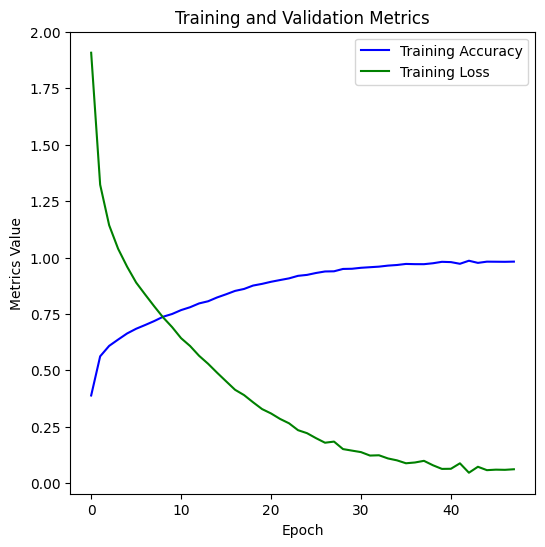

In [36]:
plt.figure(figsize=(6, 6))

# Plot Training Accuracy
plt.plot(final_history.history['accuracy'], label='Training Accuracy', color='blue')

# Plot Training Loss
plt.plot(final_history.history['loss'], label='Training Loss', color='green')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()

plt.grid(False)
plt.show()


# Visualization for Accuracy, Precision, Recall and F1-Score

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


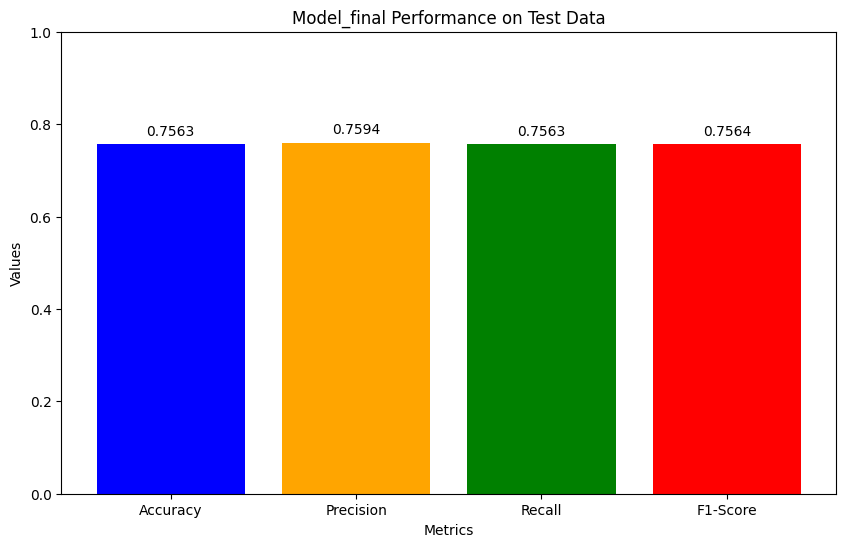

In [37]:
predictions = model_final.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
f1 = f1_score(y_test, predicted_classes, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model_final Performance on Test Data')
plt.ylim(0, 1)  # Assuming the metrics are in proportion (0 to 1)
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.4}", ha='center')
plt.show()

# Visualization of Confusion Matrix and Classification Report

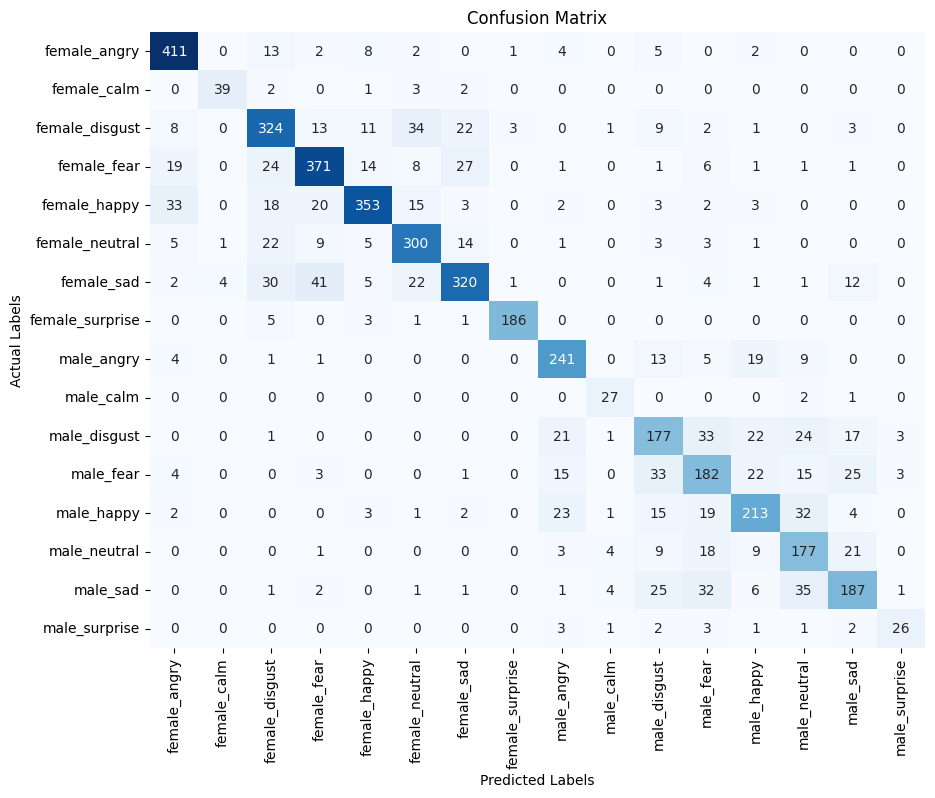

                 precision    recall  f1-score   support

   female_angry       0.84      0.92      0.88       448
    female_calm       0.89      0.83      0.86        47
 female_disgust       0.73      0.75      0.74       431
    female_fear       0.80      0.78      0.79       474
   female_happy       0.88      0.78      0.83       452
 female_neutral       0.78      0.82      0.80       364
     female_sad       0.81      0.72      0.76       444
female_surprise       0.97      0.95      0.96       196
     male_angry       0.77      0.82      0.79       293
      male_calm       0.69      0.90      0.78        30
   male_disgust       0.60      0.59      0.59       299
      male_fear       0.59      0.60      0.59       303
     male_happy       0.71      0.68      0.69       315
   male_neutral       0.60      0.73      0.66       242
       male_sad       0.68      0.63      0.66       296
  male_surprise       0.79      0.67      0.72        39

       accuracy              

In [38]:
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

class_labels = [label_map_with_gender[i] for i in range(len(label_map_with_gender))]


cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=class_labels))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>